In [1]:
from __future__ import division
from functions import *
import matplotlib.pyplot as plt
import numpy as np
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import pandas as pd

%matplotlib inline

In [2]:
# Load Data
Y_train = np.loadtxt('data/train.txt').astype(int)
Y_test = np.loadtxt('data/test.txt').astype(int)
M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies
print("Factorizing with ", M, " users, ", N, " movies.")

('Factorizing with ', 943, ' users, ', 1682, ' movies.')


In [3]:
Y_train_df = pd.DataFrame(Y_train)
Y_test_df = pd.DataFrame(Y_test)
#Y_tot = np.concatenate((Y_train, Y_test), axis=0)
#Y_tot_df = pd.DataFrame(Y_tot)

In [4]:
reader = Reader(line_format='user item rating', sep='\t')
data = Dataset.load_from_df(Y_train_df, reader)

test_data = Dataset.load_from_df(Y_test_df, reader)

trainset = data.build_full_trainset()
testset = test_data.build_full_trainset()
testset = testset.build_testset()

In [5]:
algo = SVD(n_factors = 20, n_epochs = 300, biased = True, init_mean = 0, lr_all = 0.03, reg_all = 0.1, verbose = True)
algo.fit(trainset)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
Processing

In [6]:
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 0.9134


0.9133841802934806

In [7]:
U = algo.pu
V = algo.qi

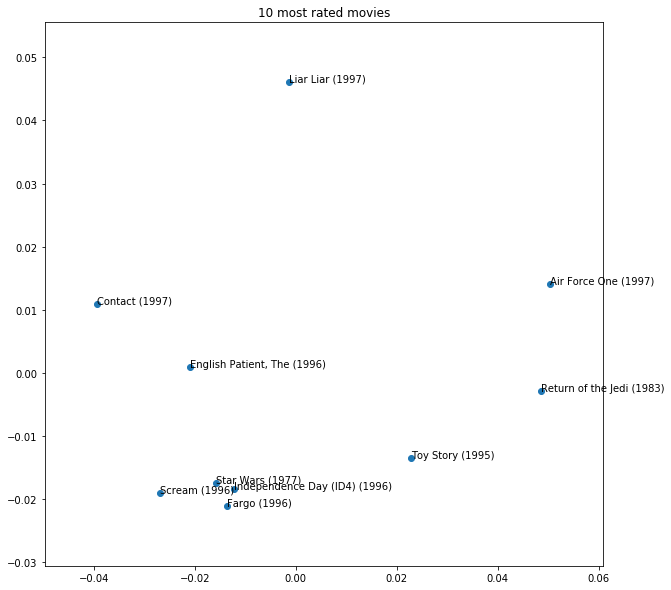

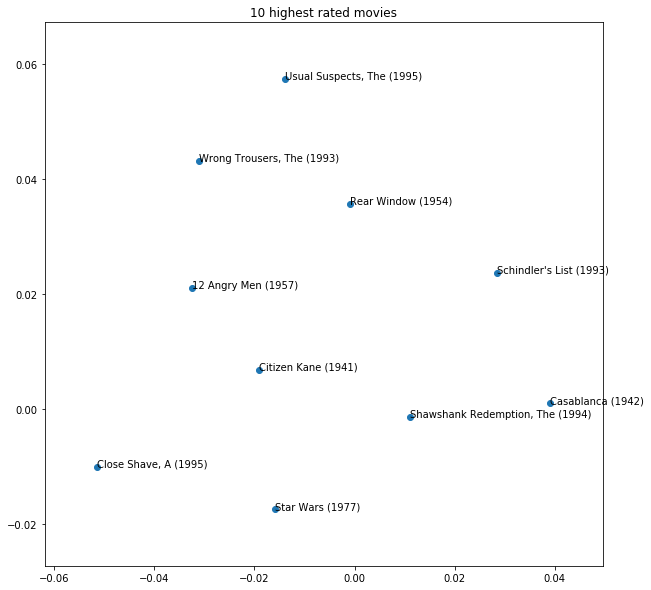

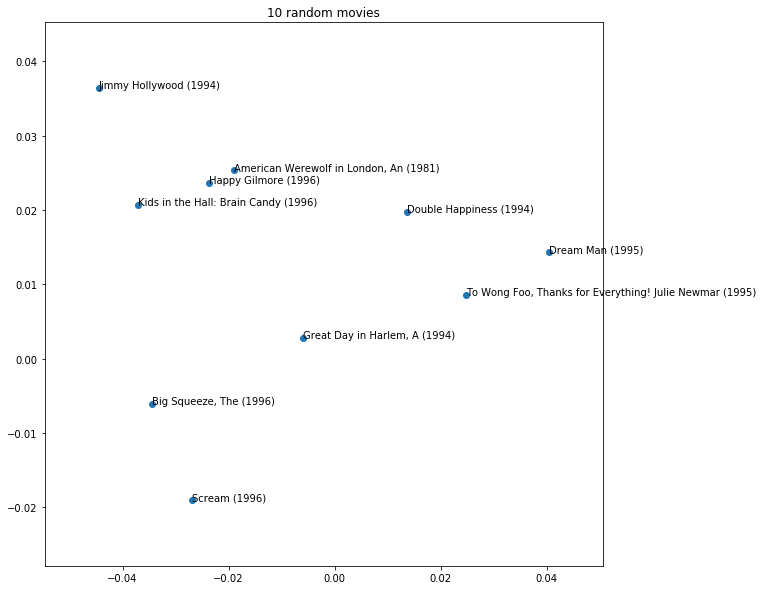

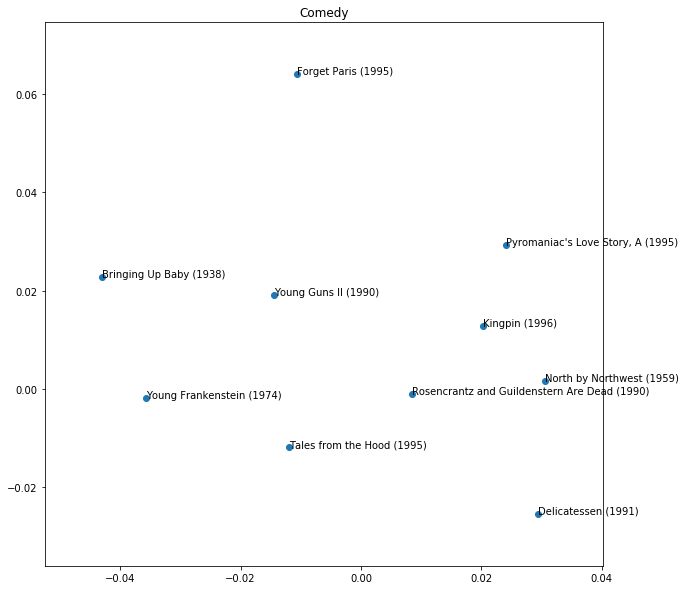

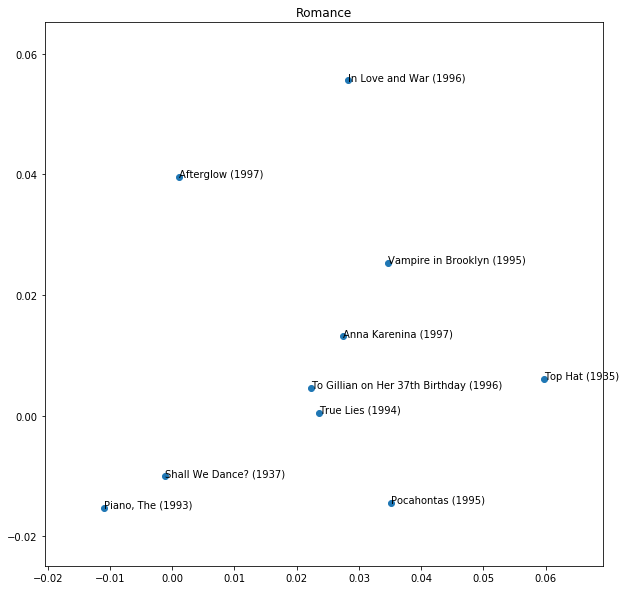

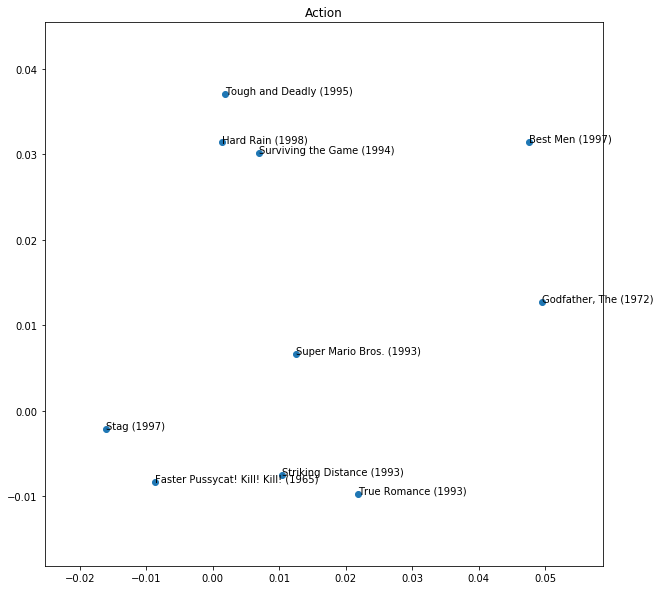

In [8]:
plot_all(V, 'surprise')